In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Conv1D, Flatten, LSTM, concatenate


2023-12-16 12:21:38.878178: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-16 12:21:38.878215: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def build_dnn_model(input_shape):
    """
    Builds a Dense Neural Network model.

    Args:
    input_shape (tuple): Shape of the input data (excluding batch size).

    Returns:
    keras.Model: A compiled Keras model.
    """
    inputs = Input(shape=input_shape)
    x = Dense(128, activation='relu')(inputs)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1)(x)  # Assuming salary prediction is a regression problem
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [3]:
def build_cnn_model(input_shape):
    """
    Builds a Convolutional Neural Network model.

    Args:
    input_shape (tuple): Shape of the input data (excluding batch size).

    Returns:
    keras.Model: A compiled Keras model.
    """
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [4]:
def build_rnn_model(input_shape):
    """
    Builds a Recurrent Neural Network model.

    Args:
    input_shape (tuple): Shape of the input data (excluding batch size).

    Returns:
    keras.Model: A compiled Keras model.
    """
    inputs = Input(shape=input_shape)
    x = LSTM(64, return_sequences=True)(inputs)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [5]:
def build_stacked_model(input_shape):
    """
    Builds a stacked model that combines DNN, CNN, and RNN models.

    Args:
    input_shape (tuple): Shape of the input data (excluding batch size).

    Returns:
    keras.Model: A compiled Keras model.
    """
    # Create individual models
    dnn = build_dnn_model(input_shape)
    cnn = build_cnn_model(input_shape)
    rnn = build_rnn_model(input_shape)

    # Combined stacked model
    combinedInput = concatenate([dnn.output, cnn.output, rnn.output])
    x = Dense(64, activation="relu")(combinedInput)
    x = Dense(1)(x)

    model = Model(inputs=[dnn.input, cnn.input, rnn.input], outputs=x)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [6]:
#setup data

data = pd.read_csv('/home/brandon/ML Zoomcamp/Capstone Project 2/salaries.csv')

In [7]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,AI Engineer,20000,EUR,21593,PT,50,PT,L
1,2023,SE,FT,Data Scientist,201650,USD,201650,US,0,US,M
2,2023,SE,FT,Data Scientist,124600,USD,124600,US,0,US,M
3,2023,SE,FT,Business Intelligence Analyst,198200,USD,198200,US,0,US,M
4,2023,SE,FT,Business Intelligence Analyst,110200,USD,110200,US,0,US,M


In [8]:
#Data EDA
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Display dataset information (column data types, non-null values, etc.)
print(data.info())

# Summary statistics for numeric columns
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467 entries, 0 to 8466
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8467 non-null   int64 
 1   experience_level    8467 non-null   object
 2   employment_type     8467 non-null   object
 3   job_title           8467 non-null   object
 4   salary              8467 non-null   int64 
 5   salary_currency     8467 non-null   object
 6   salary_in_usd       8467 non-null   int64 
 7   employee_residence  8467 non-null   object
 8   remote_ratio        8467 non-null   int64 
 9   company_location    8467 non-null   object
 10  company_size        8467 non-null   object
dtypes: int64(4), object(7)
memory usage: 727.8+ KB
None
         work_year        salary  salary_in_usd  remote_ratio
count  8467.000000  8.467000e+03    8467.000000   8467.000000
mean   2022.727058  1.756464e+05  149379.921814     39.222865
std       0.550565  4.6488

In [10]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [11]:
# Check for missing values
print(data.isnull().sum())


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


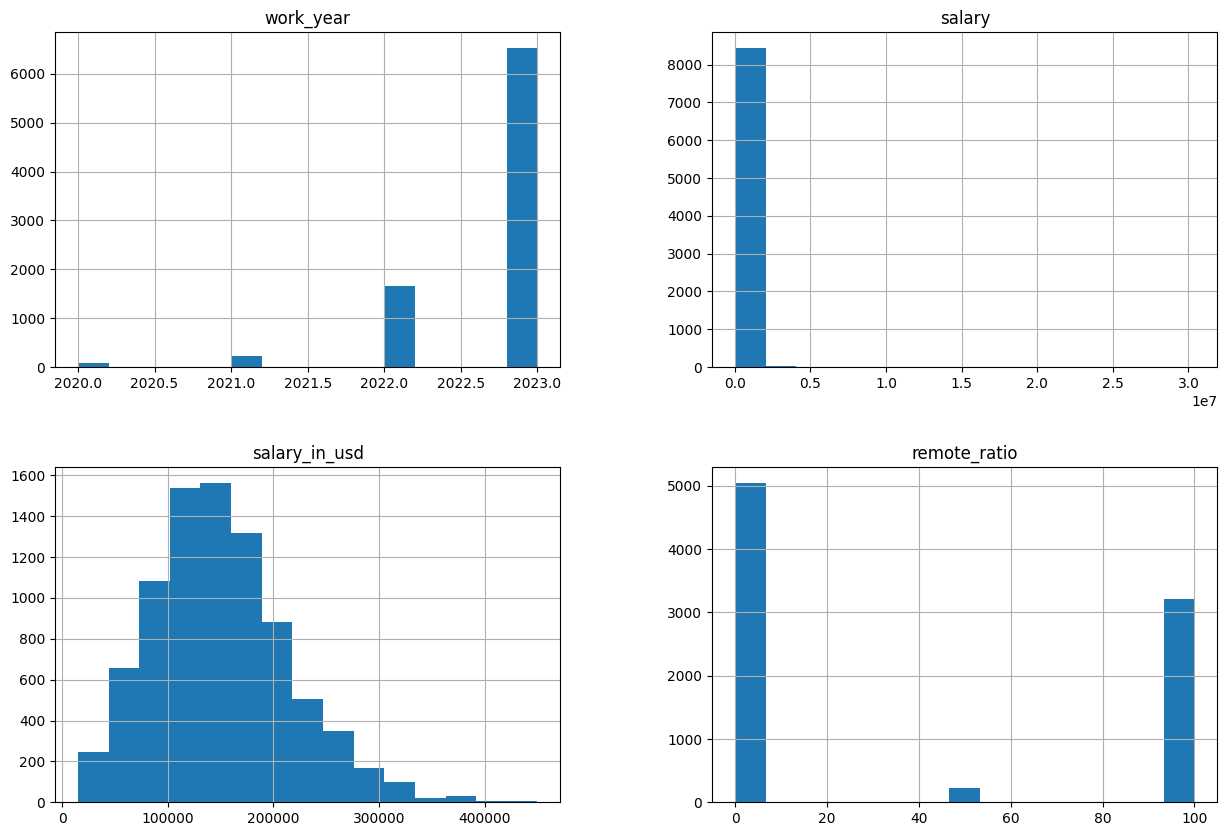

In [12]:
# Histograms for numerical features
data.hist(bins=15, figsize=(15, 10))
plt.show()


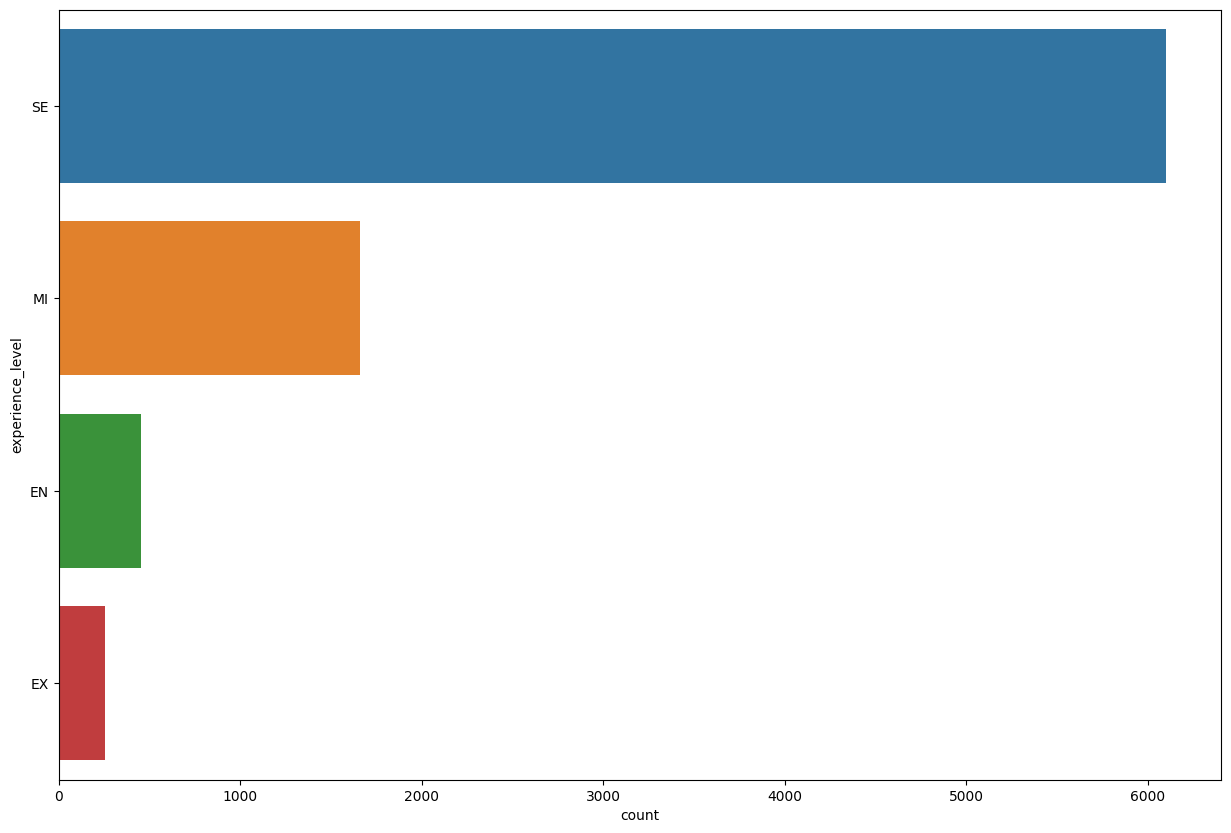

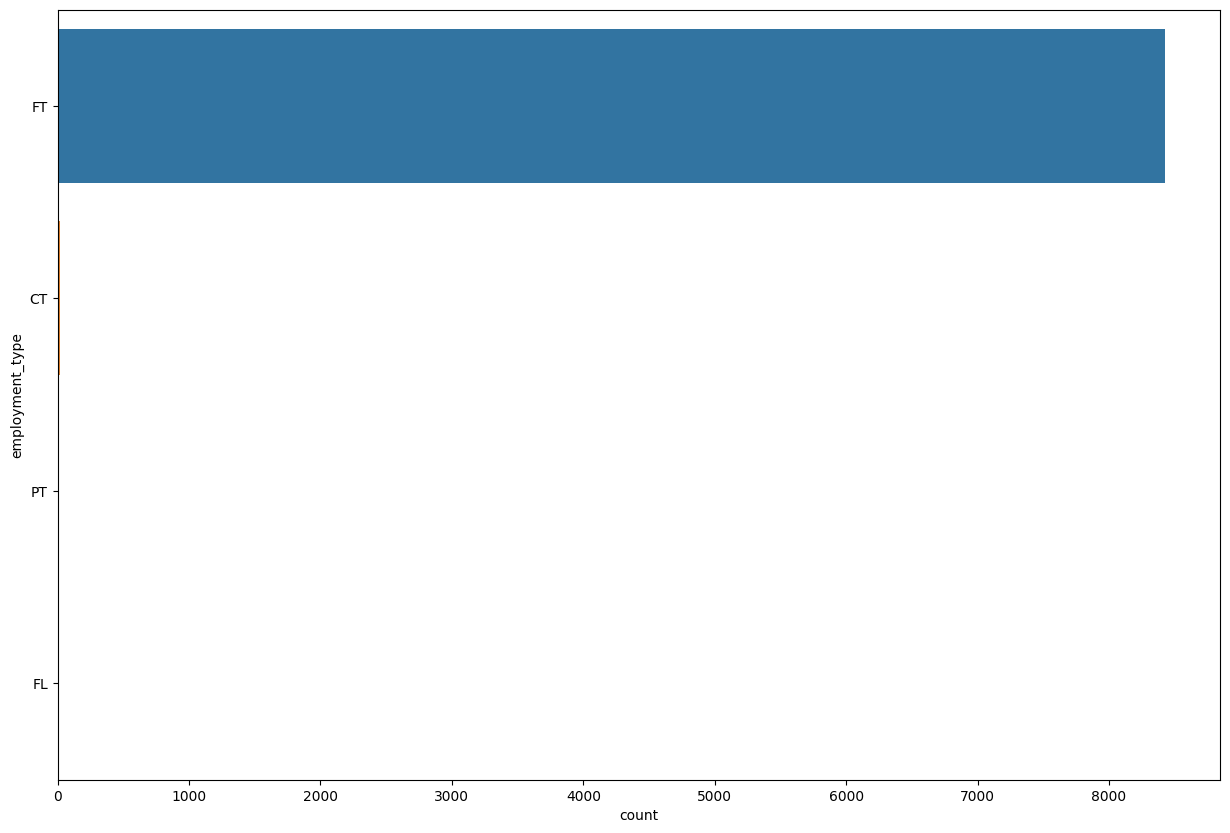

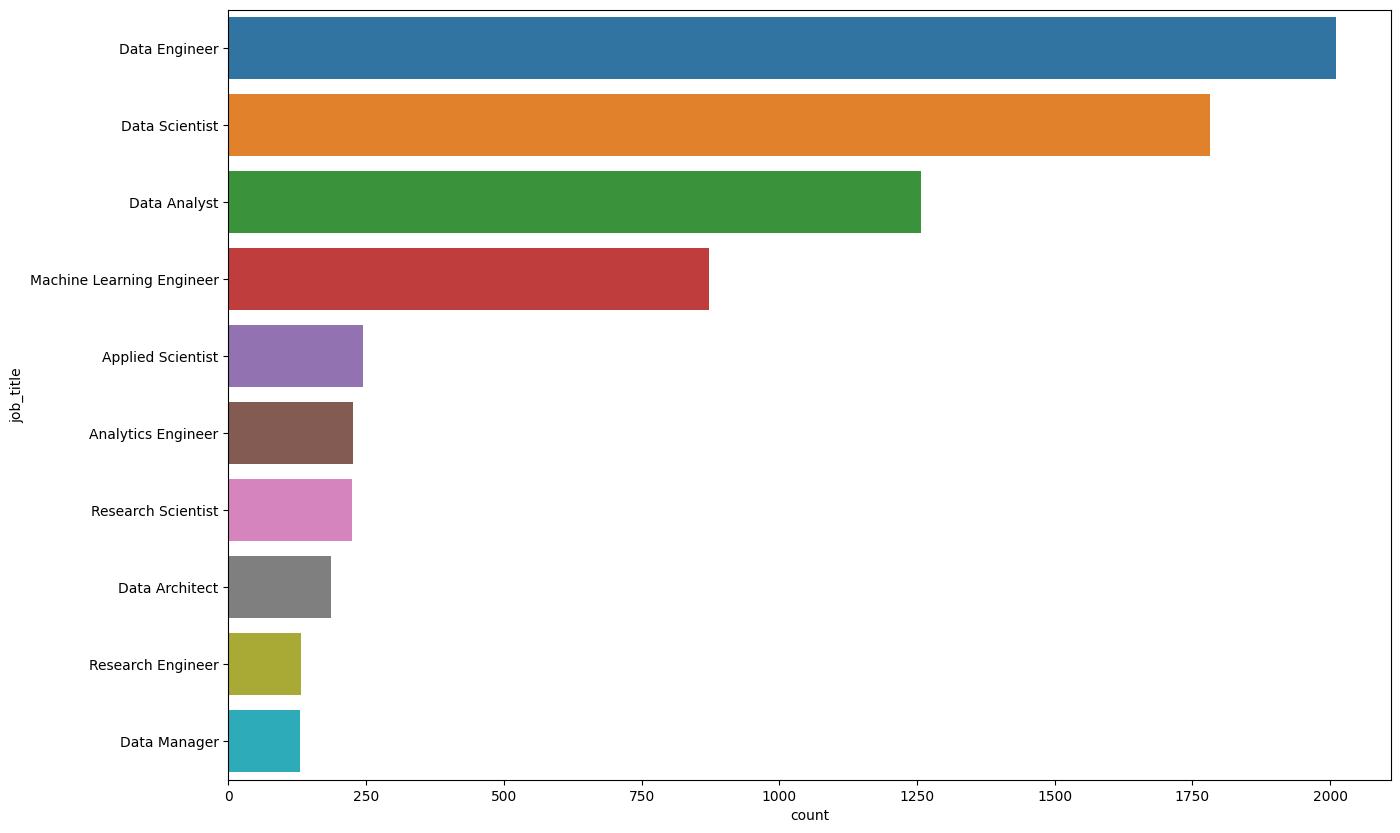

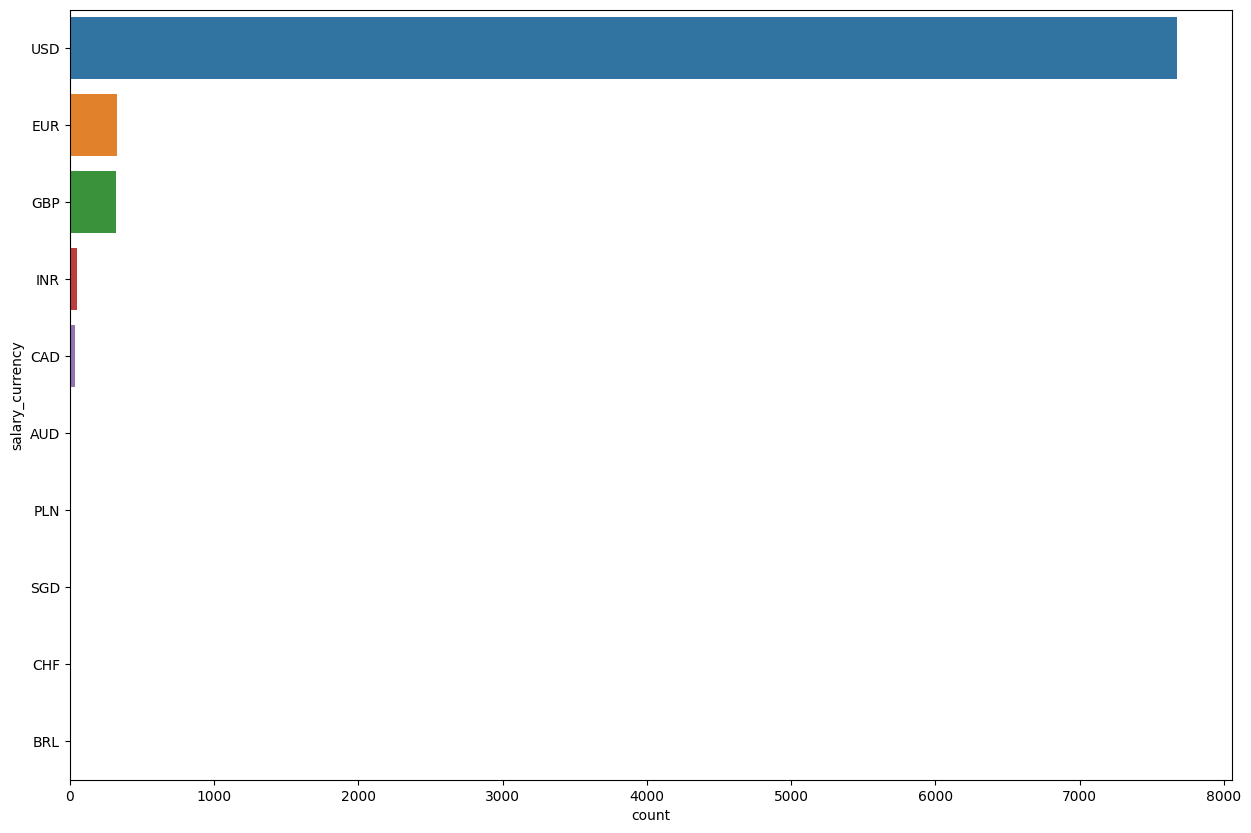

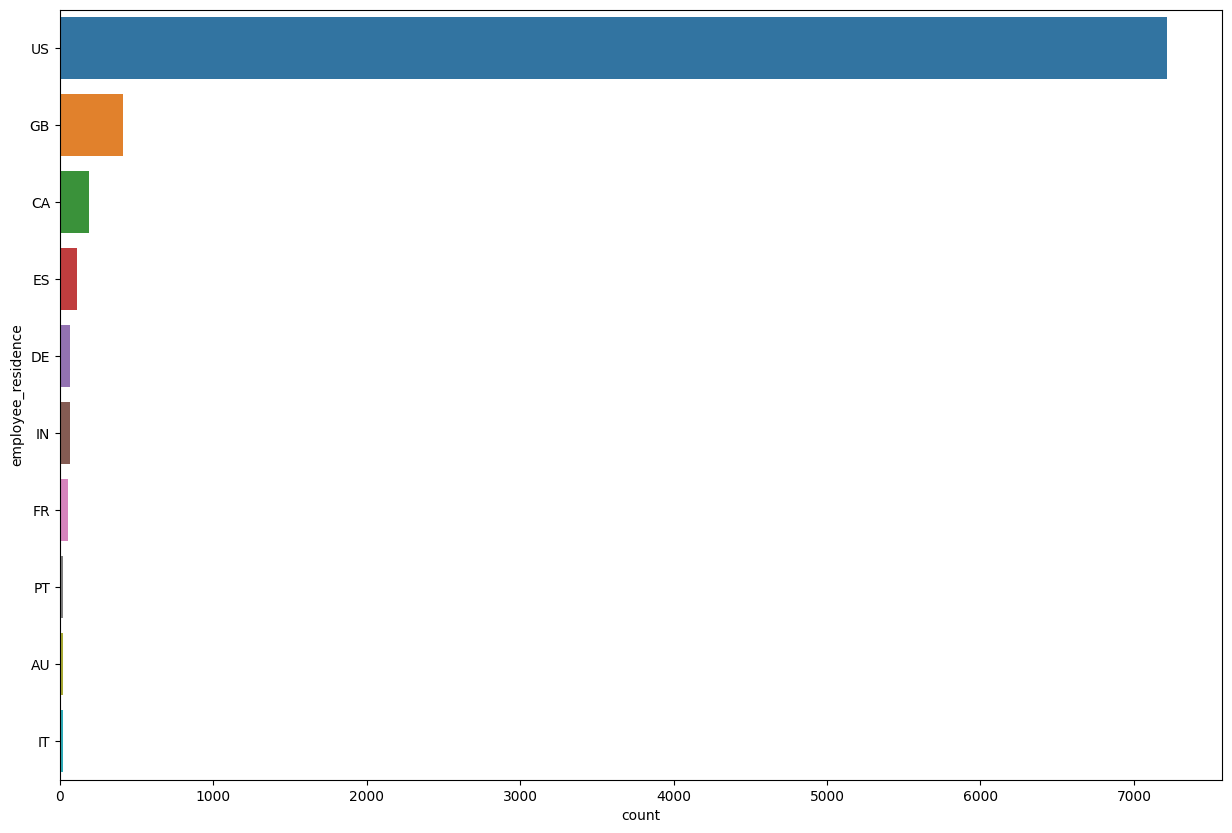

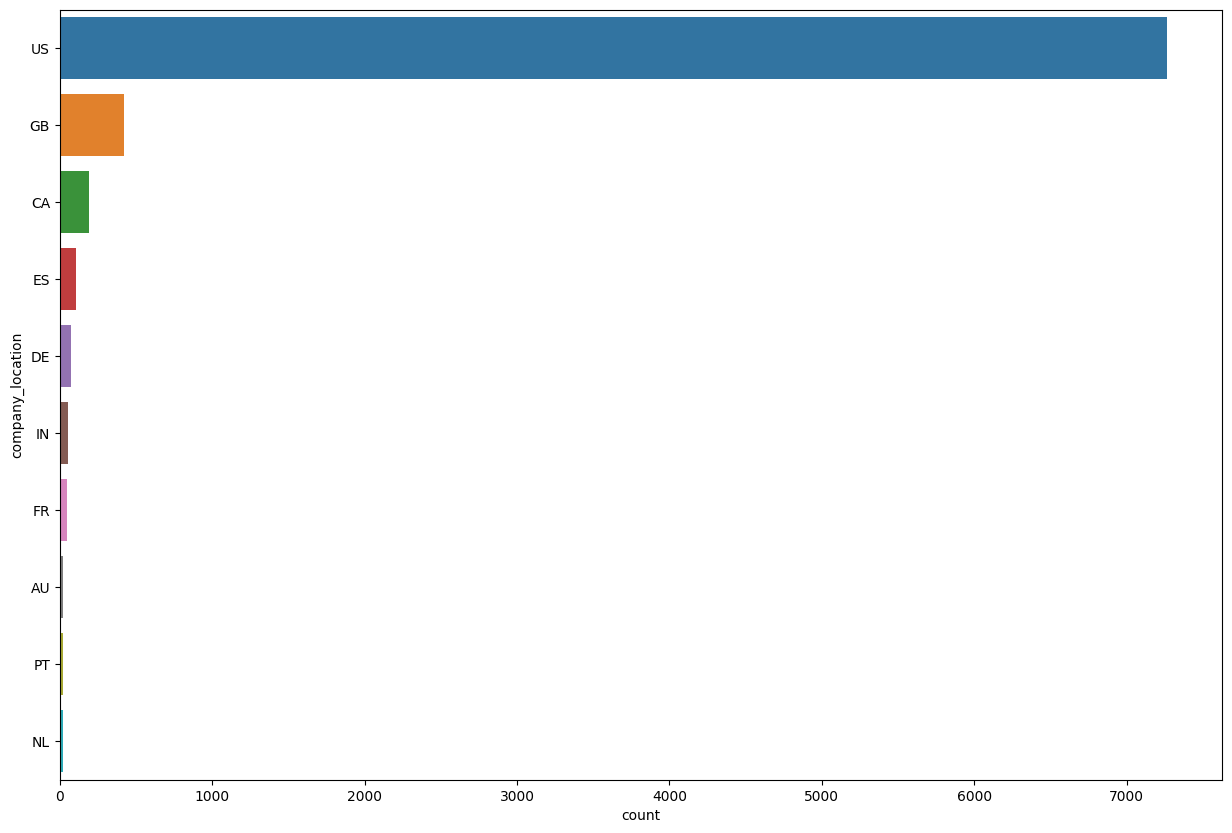

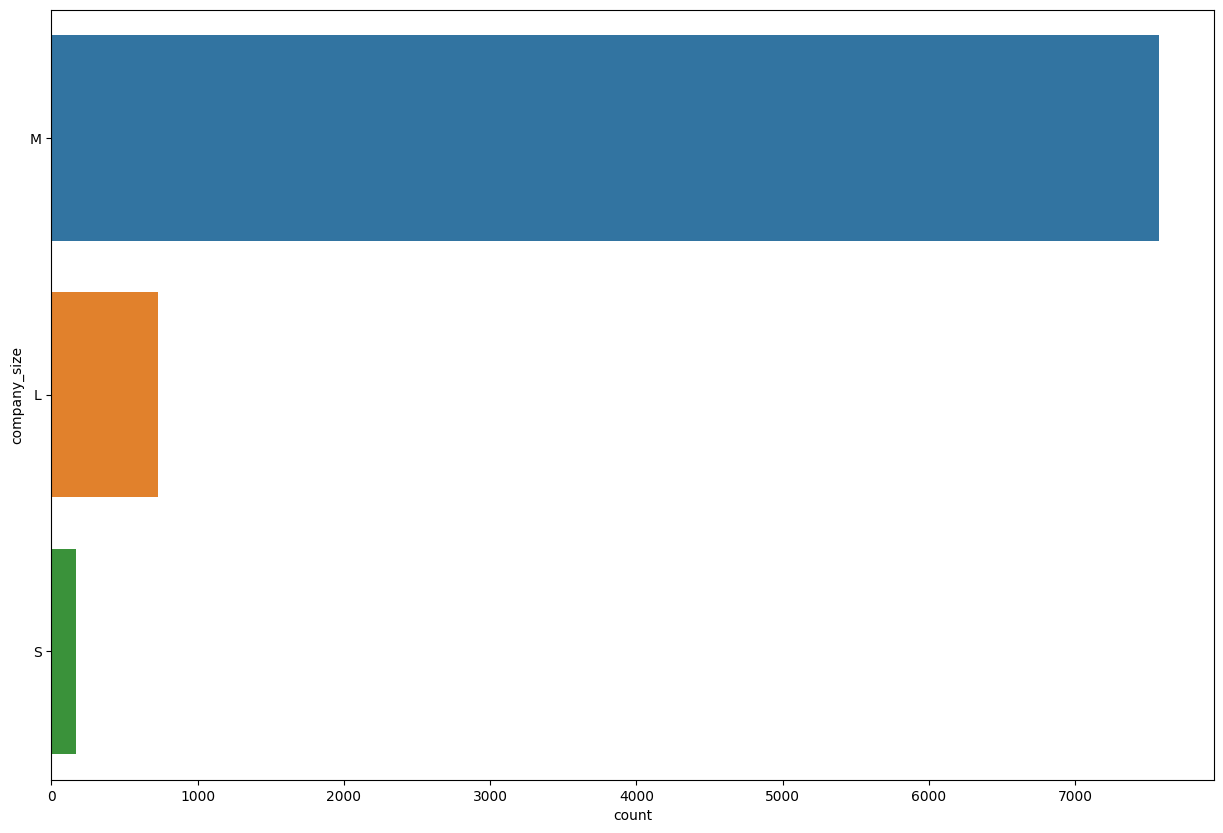

In [13]:
# Count plots for categorical features for top 10 most frequent categories
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(15, 10))
    sns.countplot(y=col, data=data, order=data[col].value_counts().iloc[:10].index)
    plt.show()
    


/tmp/ipykernel_75493/4235006495.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='viridis')


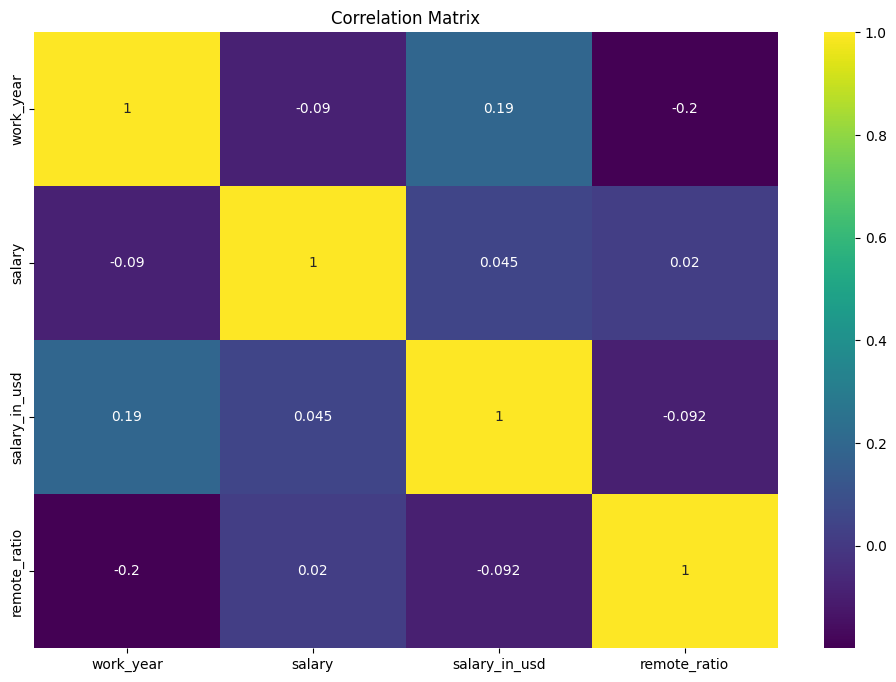

In [14]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()


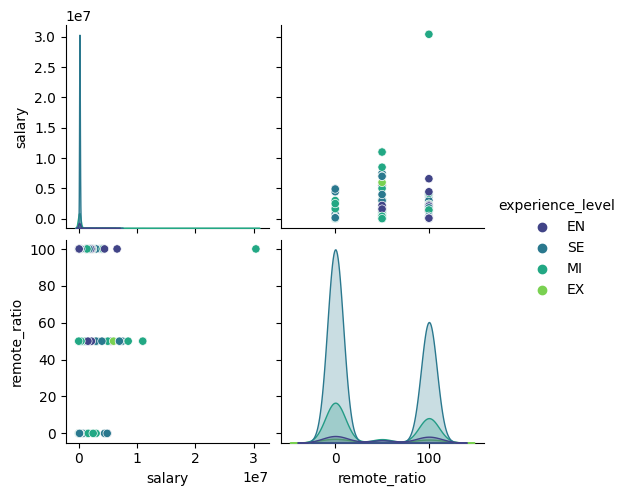

In [15]:
# Assuming 'salary' and 'remote_ratio' are numeric in your dataset
numeric_features = ['salary', 'remote_ratio']                
sns.pairplot(data=data, vars=numeric_features, hue='experience_level', palette='viridis')



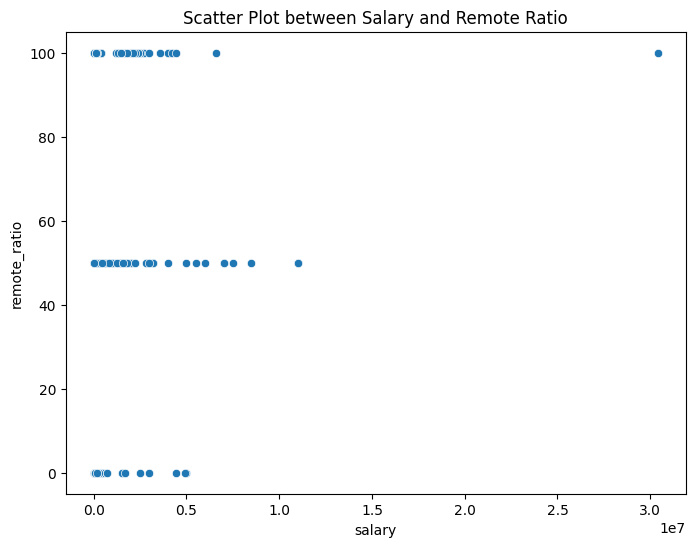

In [16]:
# Scatter plot between 'salary' and 'remote_ratio'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='salary', y='remote_ratio', data=data)
plt.title("Scatter Plot between Salary and Remote Ratio")
plt.show()


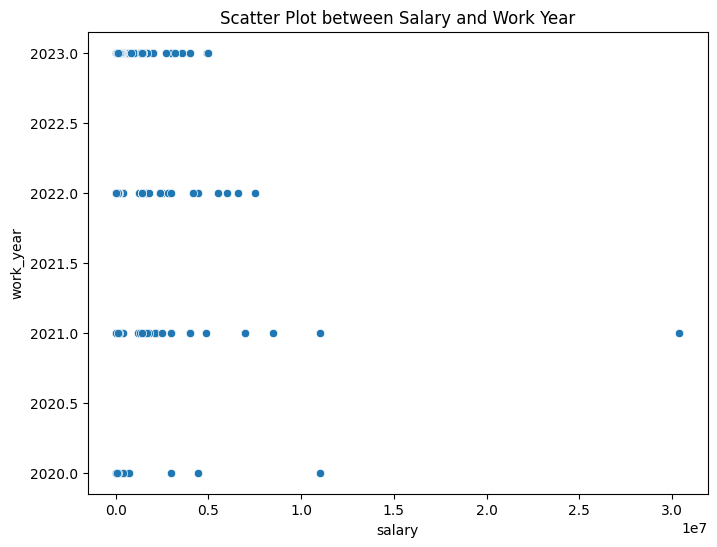

In [17]:
# Scatter plot between 'salary' and 'work_year'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='salary', y='work_year', data=data)
plt.title("Scatter Plot between Salary and Work Year")
plt.show()


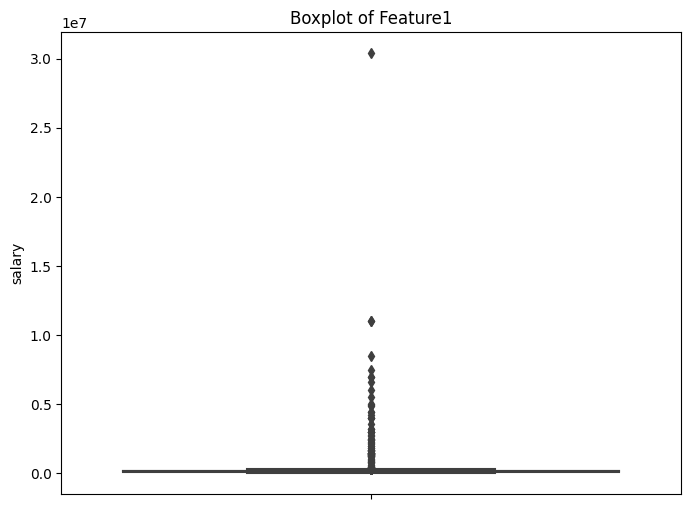

In [18]:
# Boxplot for a feature
plt.figure(figsize=(8, 6))
sns.boxplot(y='salary', data=data)
plt.title("Boxplot of Feature1")
plt.show()


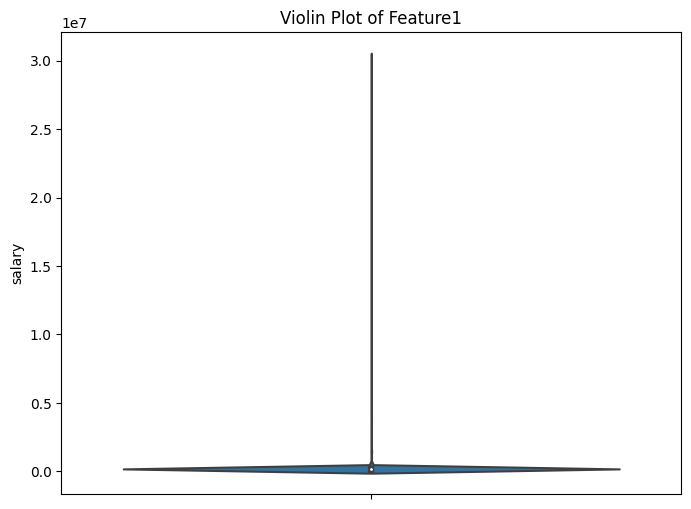

In [19]:
# Violin plot for a feature
plt.figure(figsize=(8, 6))
sns.violinplot(y='salary', data=data)
plt.title("Violin Plot of Feature1")
plt.show()


<h1>Model Testing<h1>

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']

# Identify and encode categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Scale your features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)






In [21]:
input_shape = X_train.shape[1:]  # Shape of input data excluding batch size
model = build_dnn_model(input_shape)





2023-12-16 12:22:18.881752: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-12-16 12:22:18.881806: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-12-16 12:22:18.881843: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (brandon-HP-255-G7-Notebook-PC): /proc/driver/nvidia/version does not exist
2023-12-16 12:22:18.882358: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
# Fit the model on the training data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
170/170 [==============================] - 3s 4ms/step - loss: 26590435328.0000 - val_loss: 25658314752.0000
Epoch 2/10
170/170 [==============================] - 1s 3ms/step - loss: 25421412352.0000 - val_loss: 23148767232.0000
Epoch 3/10
170/170 [==============================] - 1s 3ms/step - loss: 20877342720.0000 - val_loss: 16871297024.0000
Epoch 4/10
170/170 [==============================] - 1s 3ms/step - loss: 13465228288.0000 - val_loss: 9578455040.0000
Epoch 5/10
170/170 [==============================] - 1s 3ms/step - loss: 7369128960.0000 - val_loss: 5633336832.0000
Epoch 6/10
170/170 [==============================] - 1s 3ms/step - loss: 5004439552.0000 - val_loss: 4738495488.0000
Epoch 7/10
170/170 [==============================] - 1s 3ms/step - loss: 4494290944.0000 - val_loss: 4510289408.0000
Epoch 8/10
170/170 [==============================] - 1s 3ms/step - loss: 4291690240.0000 - val_loss: 4358593536.0000
Epoch 9/10
170/170 [=============================

In [23]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


53/53 [==============================] - 0s 2ms/step - loss: 4080506368.0000
Test Loss: 4080506368.0


In [24]:
# Make predictions (optional)
predictions = model.predict(X_test)
print(predictions)


[[2.0274089e+05]
 [1.6776245e+05]
 [9.3530102e+04]
 ...
 [1.8300186e+05]
 [9.0803040e+01]
 [8.8546977e+04]]


In [25]:
#Test the CNN model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Conv1D, Flatten
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame

# Split data into features and target
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']

# Encode categorical columns and scale features
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape X_train and X_test to add an additional dimension
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the CNN model building function (assuming this is already defined)
def build_cnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build the CNN model
input_shape = X_train_reshaped.shape[1:]  # Shape of input data excluding batch size
model = build_cnn_model(input_shape)

# Fit the model on the training data
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions (optional)
predictions = model.predict(X_test_reshaped)
print(predictions)




Epoch 1/10
170/170 [==============================] - 5s 13ms/step - loss: 25205819392.0000 - val_loss: 20041885696.0000
Epoch 2/10
170/170 [==============================] - 2s 12ms/step - loss: 11368991744.0000 - val_loss: 4420389888.0000
Epoch 3/10
170/170 [==============================] - 2s 12ms/step - loss: 4339548160.0000 - val_loss: 3988695296.0000
Epoch 4/10
170/170 [==============================] - 2s 13ms/step - loss: 4234355456.0000 - val_loss: 3943254016.0000
Epoch 5/10
170/170 [==============================] - 2s 13ms/step - loss: 4189101056.0000 - val_loss: 3901417472.0000
Epoch 6/10
170/170 [==============================] - 2s 13ms/step - loss: 4146441216.0000 - val_loss: 3855165952.0000
Epoch 7/10
170/170 [==============================] - 2s 13ms/step - loss: 4105521408.0000 - val_loss: 3817440768.0000
Epoch 8/10
170/170 [==============================] - 2s 14ms/step - loss: 4060278272.0000 - val_loss: 3771791616.0000
Epoch 9/10
170/170 [=========================

In [26]:
#Test the RNN model

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, LSTM, Flatten
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame

# Split data into features and target
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']

# Encode categorical columns and scale features
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape X_train and X_test to add an additional dimension
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the RNN model building function (assuming this is already defined)
def build_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(64, return_sequences=True)(inputs)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build the RNN model
input_shape = X_train_reshaped.shape[1:]  # Shape of input data excluding batch size
model = build_rnn_model(input_shape)

# Fit the model on the training data
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions (optional)
predictions = model.predict(X_test_reshaped)
print(predictions)



Epoch 1/10
170/170 [==============================] - 40s 217ms/step - loss: 21202790400.0000 - val_loss: 12449342464.0000
Epoch 2/10
170/170 [==============================] - 36s 213ms/step - loss: 7354540032.0000 - val_loss: 4156826624.0000
Epoch 3/10
170/170 [==============================] - 37s 215ms/step - loss: 5083921920.0000 - val_loss: 7096839168.0000
Epoch 4/10
170/170 [==============================] - 36s 215ms/step - loss: 6381971968.0000 - val_loss: 3986032384.0000
Epoch 5/10
170/170 [==============================] - 37s 215ms/step - loss: 4141669632.0000 - val_loss: 3870557952.0000
Epoch 6/10
170/170 [==============================] - 36s 215ms/step - loss: 4128493056.0000 - val_loss: 3902732544.0000
Epoch 7/10
170/170 [==============================] - 36s 213ms/step - loss: 4151303936.0000 - val_loss: 3994806016.0000
Epoch 8/10
170/170 [==============================] - 36s 209ms/step - loss: 4148950016.0000 - val_loss: 3944317184.0000
Epoch 9/10
170/170 [==========

In [27]:
#Test the Stacked model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Conv1D, Flatten, LSTM, concatenate

# Assuming 'data' is your DataFrame
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']

# Encode categorical columns and scale features
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape X_train and X_test to add an additional dimension
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

#Define other models with flatten
def build_dnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)  # Flatten the input
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    return Model(inputs, x)


def build_cnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)  # Conv1D layer
    x = Flatten()(x)  # Flatten the output
    x = Dense(64, activation='relu')(x)  # Dense layer
    return Model(inputs, x)

def build_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(64, return_sequences=False)(inputs)  # LSTM layer
    x = Dense(64, activation='relu')(x)  # Dense layer
    return Model(inputs, x)



# Define the stacked model building function
def build_stacked_model(input_shape):
    # Create individual models with the same final layer units
    dnn = build_dnn_model(input_shape)
    cnn = build_cnn_model(input_shape)
    rnn = build_rnn_model(input_shape)

    # Combined stacked model
    combinedInput = concatenate([dnn.output, cnn.output, rnn.output])
    x = Dense(64, activation="relu")(combinedInput)
    x = Dense(1)(x)

    model = Model(inputs=[dnn.input, cnn.input, rnn.input], outputs=x)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build the stacked model
input_shape = X_train_reshaped.shape[1:]  # Shape of input data excluding batch size
model = build_stacked_model(input_shape)

# Fit the model on the training data
history = model.fit([X_train_reshaped, X_train_reshaped, X_train_reshaped], y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss = model.evaluate([X_test_reshaped, X_test_reshaped, X_test_reshaped], y_test)
print(f"Test Loss: {test_loss}")

# Make predictions (optional)
predictions = model.predict([X_test_reshaped, X_test_reshaped, X_test_reshaped])
print(predictions)






Epoch 1/10
170/170 [==============================] - 39s 215ms/step - loss: 18493464576.0000 - val_loss: 3887632384.0000
Epoch 2/10
170/170 [==============================] - 36s 210ms/step - loss: 3653813504.0000 - val_loss: 3064424448.0000
Epoch 3/10
170/170 [==============================] - 36s 210ms/step - loss: 2940812800.0000 - val_loss: 2671650048.0000
Epoch 4/10
170/170 [==============================] - 40s 233ms/step - loss: 2612280320.0000 - val_loss: 2526988544.0000
Epoch 5/10
170/170 [==============================] - 41s 242ms/step - loss: 2456664320.0000 - val_loss: 2434547456.0000
Epoch 6/10
170/170 [==============================] - 39s 231ms/step - loss: 2350716672.0000 - val_loss: 2366876160.0000
Epoch 7/10
170/170 [==============================] - 39s 232ms/step - loss: 2273822208.0000 - val_loss: 2307369984.0000
Epoch 8/10
170/170 [==============================] - 39s 229ms/step - loss: 2216315648.0000 - val_loss: 2267069184.0000
Epoch 9/10
170/170 [===========

In [28]:
#What is the best model?

print(history.history.keys())
print(history.history['loss'])
print(history.history['val_loss'])
print(f'The best model is the stacked model with a loss of {min(history.history["val_loss"])}')


dict_keys(['loss', 'val_loss'])
[18493464576.0, 3653813504.0, 2940812800.0, 2612280320.0, 2456664320.0, 2350716672.0, 2273822208.0, 2216315648.0, 2143927040.0, 2087749248.0]
[3887632384.0, 3064424448.0, 2671650048.0, 2526988544.0, 2434547456.0, 2366876160.0, 2307369984.0, 2267069184.0, 2227457280.0, 2174465024.0]
The best model is the stacked model with a loss of 2174465024.0


In [29]:
#Save the stacked model using pickle

import pickle
import os

# Save the model to pickle file
filename = 'stacked_model.pkl'
pickle.dump(model, open(filename, 'wb'))




2023-12-16 12:35:53.144725: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://165f32c1-f5e1-4f80-a8a0-7b73d9af4124/assets


INFO:tensorflow:Assets written to: ram://165f32c1-f5e1-4f80-a8a0-7b73d9af4124/assets


In [30]:
# Load the model from the pickle file

with open(filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [ ]:
# Save the TensorFlow model
model.save('stacked_model.h5')


In [1]:
#Create a requirements.txt file from the environment

# Create a requirements.txt file
import os
os.system('pip freeze > requirements.txt')


0

In [2]:
import session_info

session_info.show(excludes=['mitosheet'])